# <center> 6_ANN For Regression 

## 导入必要的库

In [1]:
%%time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

CPU times: user 233 ms, sys: 13.1 ms, total: 246 ms
Wall time: 248 ms


## 生成数据集

CPU times: user 19.4 ms, sys: 1.93 ms, total: 21.3 ms
Wall time: 21.6 ms


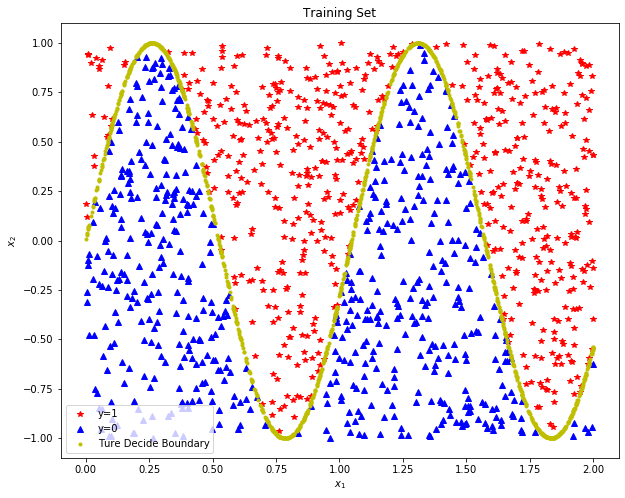

In [2]:
%%time
def tureFunction(x):  #边界分类函数
    return np.sin(6*x1)

#训练集样本数
m=2000
np.random.seed(233)
m_tr=int(m*0.6)

x1=np.random.uniform(0,2,m_tr)
x1=x1.reshape(m_tr,1)

x2=np.random.uniform(-1,1,m_tr)
x2=x2.reshape(m_tr,1)



tureBoundary=tureFunction(x1)

#根据预设边界给样本点打上标签
Y_target=np.zeros((m_tr,1))

for i in np.arange(m_tr):
    if x2[i,0] >= tureBoundary[i,0]:
        Y_target[i,0]=1
     
XX=np.hstack((x1,x2))
yy=Y_target

plt.figure(figsize=(10,8))
plt.plot(x1[np.where(Y_target==1)],x2[np.where(Y_target==1)],"r*",label="y=1")
plt.plot(x1[np.where(Y_target==0)],x2[np.where(Y_target==0)],"b^",label="y=0")

plt.plot(x1,tureBoundary,"y.",label="Ture Decide Boundary")
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title("Training Set")
plt.legend(loc="best")


## 定义ANN算法

In [14]:
%%time
'''此栏中的ann算法适合于2及以上隐层，
而ANN算法适用于1~n个隐层'''

'''ANN(input_object,target,n_iter,alpha,hidden_layer_num,hidden_layer_dimension)
ANN(坐标变量、y值，训练次数，学习率，隐藏层数，隐藏层宽度)'''

#定义sigmod函数
def sigmod(x):
    return 1/(1+np.exp(-x))

#先定义适合两个及以上隐藏层的ann算法
#ann(input_object,target,n_iter,alpha,hidden_layer_num,hidden_layer_dimension)
#ann(坐标变量、y值，训练次数，学习率，隐藏层数，隐藏层宽度)
def ann(input_object,target,n_iter,alpha,hidden_layer_num,hidden_layer_dimension):
    input_length=input_object.shape[0] #输入变量的行数
    input_width=input_object.shape[1] #输入变量的列数
    output_dimension=1 #输出层的数量
    X=input_object   
    y=target.reshape(-1,1)
    #定义第一个omega和最后一个omega
    Omega_input_to_hidlay=np.random.randn(input_width+1,hidden_layer_dimension)
    Omega_hidlay_to_out=np.random.randn(hidden_layer_dimension+1,output_dimension)
    
    n=hidden_layer_num  #隐藏层的数量
    m=hidden_layer_dimension #1个隐藏层的宽度
    #定义每两个隐藏层之间的omega
    Omega_between_hidlay=np.zeros((n-1,m+1,m))
    for i in range(n-1):
        Omega_between_hidlay[i]=np.random.randn(m+1,m)
    
    #设置绘图用的损失函数J，横坐标Jx，以及记录训练精度
    J=np.empty(n_iter)
    Jx=np.empty(n_iter)
    Accuracy=np.empty(n_iter)
    #开始训练
    for i in range(n_iter):
        #先计算a1与a11
        a1=X
        a11=np.insert(a1,0,values=1,axis=1)
        
        #定义ax及ax1
        hidden_layer_a=np.zeros((n,input_length,m))
        hidden_layer_a1=np.zeros((n,input_length,m+1))
        
        #定义Z2,3,...,n+1
        Z_of_hidlay=np.zeros((n,input_length,m))
        
        #计算Z2
        Z_of_hidlay[0]=np.dot(a11,Omega_input_to_hidlay)
        
        #计算a2及a21
        hidden_layer_a[0]=sigmod(Z_of_hidlay[0])
        hidden_layer_a1[0]=np.insert(hidden_layer_a[0],0,values=1,axis=1)
        
        #计算ax,ax1,Zx
        for j in range(1,n,1):
            Z_of_hidlay[j]=np.dot(hidden_layer_a1[j-1],Omega_between_hidlay[j-1])
            hidden_layer_a[j]=sigmod(Z_of_hidlay[j])
            hidden_layer_a1[j]=np.insert(hidden_layer_a[j],0,values=1,axis=1)
        
        #计算输出层的Z与a
        Z_last=np.dot(hidden_layer_a1[n-1], Omega_hidlay_to_out)
        a_out=sigmod(Z_last)
        
        #计算cost function
        H=np.log10(a_out)
        H1=np.log10(1-a_out)
        Y1=1-y
        J[i]=-(np.dot(y.T,H)+np.dot(Y1.T,H1))/input_length
        Jx[i]=i
        
        #计算分类精度
        tp=len(np.where((a_out>=0.5)&(y==1))[0])
        tn=len(np.where((a_out<0.5)&(y==0))[0])
        Accuracy[i]=(tp+tn)/input_length
        
        #反向传播
        delta_last=a_out-y
        d_Omega_hidlay_to_out=np.dot(hidden_layer_a1[n-1].T,delta_last)
        
        delta_between_hidlay=np.zeros((n-1,input_length,m))
        delta_between_hidlay[n-2]=np.dot(delta_last,Omega_hidlay_to_out[1:,:].T)*(hidden_layer_a[n-1]*(1-hidden_layer_a[n-1]))
        d_Omega_between_hidlay=np.zeros((n-1,m+1,m))
        
        d_Omega_between_hidlay[n-2]=np.dot(hidden_layer_a1[n-2].T,delta_between_hidlay[n-2])
        
        for k in range(n-3,-1,-1):
            delta_between_hidlay[k]=np.dot(delta_between_hidlay[k+1],(Omega_between_hidlay[k+1])[1:,:].T)*(hidden_layer_a[k+1]*(1-hidden_layer_a[k+1]))
            d_Omega_between_hidlay[k]=np.dot(hidden_layer_a1[k].T, delta_between_hidlay[k])
            
        delta_first=np.dot(delta_between_hidlay[0],(Omega_between_hidlay[0])[1:,:].T)*(hidden_layer_a[0]*(1-hidden_layer_a[0]))
        d_Omega_input_to_hidlay=np.dot(a11.T,delta_first)
        
        #权重更新
        Omega_input_to_hidlay=Omega_input_to_hidlay-alpha*d_Omega_input_to_hidlay/input_length
        
        Omega_hidlay_to_out=Omega_hidlay_to_out-alpha*d_Omega_hidlay_to_out/input_length
        
        for q in range(n-1):
            Omega_between_hidlay[q]=Omega_between_hidlay[q]-alpha*d_Omega_between_hidlay[q]/input_length
    #返回值
    return Jx,J,Accuracy 

#定义适合1、2、3、......个隐藏层的ANN算法
#ANN(input_object,target,n_iter,alpha,hidden_layer_num,hidden_layer_dimension)
#ANN(坐标变量、y值，训练次数，学习率，隐藏层数，隐藏层宽度)
def ANN(input_object,target,n_iter,alpha,hidden_layer_num,hidden_layer_dimension):
    if hidden_layer_num==1:
        n_iter=n_iter
        alpha=alpha
        m=input_object.shape[0]
        input_dimension=input_object.shape[1]
        hidden_layer_1_dimension=hidden_layer_dimension
        output_dimension=1
        X=input_object
        y=target.reshape(-1,1)
        Omega1=np.random.randn(input_dimension+1,hidden_layer_1_dimension)
        Omega2=np.random.randn(hidden_layer_1_dimension+1,output_dimension)
        J_ann=np.empty(n_iter)
        Jx_ann=np.empty(n_iter)
        Accuracy_ann=np.empty(n_iter)
        #开始训练
        for i in np.arange(n_iter):
            #定义矩阵
            a1=X
            a11=np.insert(a1,0,values=1,axis=1)
            Z2=np.dot(a11,Omega1)
            a2=sigmod(Z2)
            a21=np.insert(a2,0,values=1,axis=1)
            Z3=np.dot(a21,Omega2)
            a3=sigmod(Z3)
            #计算cost function
            H=np.log10(a3)
            H1=np.log10(1-a3)
            Y1=1-y
            J_ann[i]=-(np.dot(y.T,H)+np.dot(Y1.T,H1))/m
            Jx_ann[i]=i
            #计算分类精度
            tp=len(np.where((a3>=0.5)&(y==1))[0])
            tn=len(np.where((a3<0.5)&(y==0))[0])
            Accuracy_ann[i]=(tp+tn)/m 
            #反向传播 Backpropagation
            delta3=a3-y
            d_Omega2=np.dot(a21.T,delta3)
            delta2=np.dot(delta3,Omega2[1:,:].T)*(a2*(1-a2))
            d_Omega1=np.dot(a11.T,delta2)
            #update weights
            Omega1=Omega1-alpha*d_Omega1/m
            Omega2=Omega2-alpha*d_Omega2/m
    else:
        Jx_ann,J_ann,Accuracy_ann=ann(input_object,target,n_iter,alpha,hidden_layer_num,hidden_layer_dimension)
    
    return Jx_ann,J_ann,Accuracy_ann 
            


CPU times: user 10 µs, sys: 0 ns, total: 10 µs
Wall time: 13.4 µs


## 进行训练

In [40]:
#ANN(input_object,target,n_iter,alpha,hidden_layer_num,hidden_layer_dimension)
#ANN(坐标变量、y值，训练次数，学习率，隐藏层数，隐藏层宽度)
Jx,J,Accuracy=ANN(XX,yy,10000,0.5,2,10)

## 画出训练损失函数及精度变化

CPU times: user 22.8 ms, sys: 995 µs, total: 23.8 ms
Wall time: 24.2 ms


Text(0.5, 1.0, 'Train Accuracy')

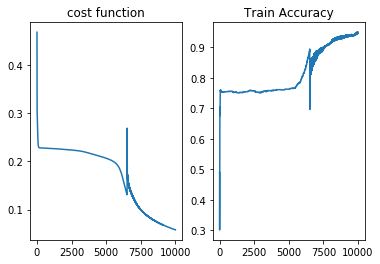

In [41]:
%%time
plt.subplot(121)
plt.plot(Jx,J)
plt.title("cost function")
plt.subplot(122)
plt.plot(Jx,Accuracy)
plt.title("Train Accuracy")

## 生成测试集

In [42]:
%%time
#测试样本数，20个测试样本
m_test=40

#生成验证集
np.random.seed(233)
x1_test=np.random.rand(m_test,1)
x2_test=np.random.rand(m_test,1)


tureBoundary_test=tureFunction(x1_test)

Y_test=np.zeros((m_test,1))

for i in np.arange(m_test):
    if x2_test[i,0]>=tureBoundary_test[i,0]:
        Y_test[i,0]=1

x1_test=x1_test.reshape(m_test,1)
x2_test=x2_test.reshape(m_test,1)
XX_test=np.hstack((x1_test,x2_test))
yy_test=Y_test

CPU times: user 249 µs, sys: 1e+03 ns, total: 250 µs
Wall time: 264 µs


## 进行测试并对比训练集与测试集的精度

In [43]:
%%time
#进行测试
Jx_test,J_test,Accuracy_test=ANN(XX_test,yy_test,10000,0.5,2,10)

print("Train Accuracy:",Accuracy[-1])
print("="*20)
print("Test Accuracy:",Accuracy_test[-1])

Train Accuracy: 0.95
Test Accuracy: 1.0
CPU times: user 2.25 s, sys: 12 ms, total: 2.26 s
Wall time: 2.29 s


## 宽度增加与学习难度的关系

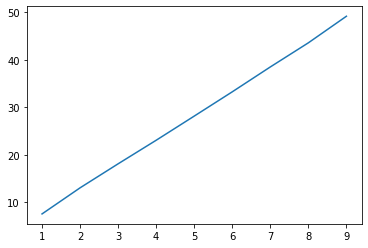

In [18]:
import time

timex=[]
run_time=[]
#ann(input_object,target,n_iter,alpha,hidden_layer_num,hidden_layer_dimension)
#ann(坐标变量、y值，训练次数，学习率，隐藏层数，隐藏层宽度)

for h in range(1,10,1):
    timex.append(h)
    start = time.process_time()
    a,b,c=ANN(XX,yy,10000,0.5,h,10)
    end = time.process_time()
    run_time.append(end-start)

plt.plot(timex,run_time)

### 由上图可以见到，随着宽度的增加，学习所需时间也在增加。

## 深度增加与学习难度的关系

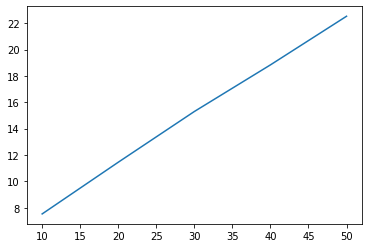

In [27]:
import time

timexx=[]
run_timex=[]
#ann(input_object,target,n_iter,alpha,hidden_layer_num,hidden_layer_dimension)
#ann(坐标变量、y值，训练次数，学习率，隐藏层数，隐藏层宽度)

for s in range(10,51,10):
    timexx.append(s)
    start = time.process_time()
    a,b,c=ANN(XX,yy,10000,0.5,1,s)
    end = time.process_time()
    run_timex.append(end-start)

plt.plot(timexx,run_timex)

### 由上图可见，随着深度的增加，学习所需的时间也在增加。

## Q:什么是ann的特征函数？